# Análisis de Series de Tiempo Fisiológicas con Python

In [1]:
print("hola")

hola


<small>Versión 1.0.2</small>

En este curso aprenderemos a hacer análisis básico de series de tiempo fisiológicas usando Python.

Este *Jupyter notebook* contiene ejercicios comentados que ilustran el uso de algunas herramientas de numpy, scipy y matplotlib para visualizar y analizar series de tiempo. Como ejemplos usaremos series de tiempo fisiológicas reales obtenidas de fuentes diversas (con permiso).

## 0. Cómo usar este notebook

Jupyter notebook es un intérprete interactivo de Python. El notebook está separado en *celdas*. Cada celda puede contener código de Python (seleccionando *Code* en el *dropdown* en la barra herramientas) o texto normal con opciones de formato (seleccionando *Markdown*).

Para **ejecutar** una celda, **posiciónate en ella** con el mouse o el teclado, y oprime **CTRL + ENTER**. Esto ejecutará el código de Python que contiene o dará formato al texto que ingregaste usando Markdown.

Intenta ejecutar el código siguiente:

In [2]:
print("Este código fue ejecutado!")

Este código fue ejecutado!


Debería haber aparecido el texto "Este código fue ejecutado!" en la parte inferior de la celda. También puedes ejecutar una celda con **SHIFT + ENTER**; al terminar la ejecución quedarás en la celda siguiente.

Para **guardar** el estado actual del notebook, oprime **CTRL + S**. También puedes hacer clic en el ícono de guardar en la barra de herramientas o seleccionar "Save and Checkpoint" en el menú File.

In [4]:
import numpy 


6

## 1. Preliminares: importar librerías

Muchas de las funcionalidades que usaremos son parte de las librerías de terceros **numpy**, **scipy** y **matplotlib**.

Para poder usarlas debemos primero importarlas al notebook. Ejecuta la siguiente celda (puede tardar la primera vez):

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import scipy.optimize
import scipy.signal

Si no aparece ningún mensaje de error es que han sido importadas con éxito. Usamos *as* para crear aliases cortos de los nombres de librerías; los aliases np y plt son usados muy frecuentemente.

In [9]:
def miFuncion(x,y):
    return x+y

miFuncion(2,5)

7

## 2. Cargar datos desde disco

Todo proceso de análisis comienza cargando los datos al entorno de Python. Cuando los datos están guardados en formato ASCII (texto simple) es sencillo cargarlos usando **np.loadtxt()**.

El archivo **datos/200.txt** contiene un extracto de un ECG de dos derivaciones obtenido de PhysioNet (https://physionet.org/physiobank/database/mitdb/). Lo podemos cargar usando numpy así:

In [32]:
data = np.loadtxt("datos/200.csv", delimiter=",")
print(data)

subdata = data[-5: ,:2]
subdata

[[ 3600.  1000.  1040.]
 [ 3601.   994.  1041.]
 [ 3602.   995.  1042.]
 ..., 
 [ 9597.   974.  1026.]
 [ 9598.   972.  1024.]
 [ 9599.   967.  1022.]]


array([[ 9595.,   970.],
       [ 9596.,   972.],
       [ 9597.,   974.],
       [ 9598.,   972.],
       [ 9599.,   967.]])

Podemos verificar la forma y tamaño del arreglo imprimiendo su *shape*:

In [ ]:
print(data.shape)

Esto nos dice que el arreglo contiene 6000 filas y 3 columnas. En este archivo, la primera columna contiene el número de dato, y las siguientes dos corresponden a las derivaciones "modified limb II" y "V2" (precordial).

Por default, np.loadtxt() reconoce las columnas de cada fila cuando están separadas por uno o más espacios en blanco. Un formato común de intercambio de datos es CSV, **c**omma-**s**eparated **v**alues, separa las columnas con una coma (y quizás espacios). Podemos especificarle a np.loadtxt() qué caracter usar como delimitador usando la opción *delimiter*.

El archivo "datos/200.csv" contiene la misma información, pero separada por comas.

In [ ]:
data = np.loadtxt("datos/200.csv", delimiter=",")
print(data.shape)

Por default np.loadtxt() ignorará líneas que empiecen con "#", y se puede configurar el caracter con la opción *comments="[caracter]"*.

Se puede también brincar un determinado líneas (de datos) al principio del archivo usando la opción *skiprows=[número de líneas]*.

Finalmente, si sólo queremos extraer algunas columnas del archivo podemos usar la opción *usecols=[lista de columnas separadas por comas]*. Por ejemplo, si sólo queremos extraer los datos de ECG de la derivación II, guardados en la segunda columna:

In [19]:
ecg = np.loadtxt("datos/200.txt", usecols=(1,2))
print(ecg.shape)
ecg

(6000, 2)


array([[ 1000.,  1040.],
       [  994.,  1041.],
       [  995.,  1042.],
       ..., 
       [  974.,  1026.],
       [  972.,  1024.],
       [  967.,  1022.]])

**OJO**: en Python la numeración empieza en 0, así que la primera columna es la 0, la segunda es la 1, etc.

## 3. Manipulación básica de datos

Podemos ver el contenido de un arreglo de numpy imprimiéndolo directamente; si al arreglo es grande se mostrará de forma abreviada:

In [ ]:
print(data)

In [ ]:
print(ecg)

Podemos accesar los elementos individuales de cualquier arreglo a través de sus índices usando la siguiente sintaxis:

In [ ]:
print(data[0,2])

También podemos usar rangos de índices, y esto extraerá un subconjunto de los datos. Por ejemplo, si sólo queremos las primers 10 filas de *data*:

In [35]:
print(data)

subdata = data[0:100:10, :]
print(subdata)

[[ 3600.  1000.  1040.]
 [ 3601.   994.  1041.]
 [ 3602.   995.  1042.]
 ..., 
 [ 9597.   974.  1026.]
 [ 9598.   972.  1024.]
 [ 9599.   967.  1022.]]
[[ 3600.  1000.  1040.]
 [ 3610.   986.  1038.]
 [ 3620.   981.  1030.]
 [ 3630.   976.  1037.]
 [ 3640.   973.  1032.]
 [ 3650.   964.  1032.]
 [ 3660.   968.  1028.]
 [ 3670.   964.  1028.]
 [ 3680.   970.  1035.]
 [ 3690.   974.  1036.]]


El ":" sin valores numéricos quiere decir "todos los valores" (en este caso todas las columnas).

En la sintaxis "a:b" se incluye el primer índice, a, pero se *excluye* el segundo, b, así que "0:10" quiere decir "del valor 0 hasta el valor 9".

También se puede usar la sintaxis "a:b:s" para ir brincando de s en s valores. Lo siguiente nos da las primeras 100 filas de 10 en 10:

In [ ]:
subdata = data[0:100:10,:]
print(subdata)

Los arreglos de numpy reconocen las operaciones aritméticas comunes. Sumar, restar, multiplicar o dividir un escalar aplica esa operación *a cada elemento* del arreglo, como en el ejemplo siguiente:

In [3]:
a = np.array([1, 2, 3, 4])
print("a      =", a)
print("a + 10 =", a + 10)
print("a - 10 =", a - 10)
print("a * 10 =", a * 10)
print("a / 10 =", a / 10)

a      = [1 2 3 4]
a + 10 = [11 12 13 14]
a - 10 = [-9 -8 -7 -6]
a * 10 = [10 20 30 40]
a / 10 = [ 0.1  0.2  0.3  0.4]


También se puede aplicar las operaciones aritméticas a dos arreglos, siempre y cuando tengan las mismas dimensiones, y la operación será también aplicada *elemento a elemento*:

In [51]:
a = np.array([10, 20, 30, 40])
b = np.array([1, 2, 3, 4])
print("a     =", a)
print("b     =", b)
print("a + b =", a + b)
print("a - b =", a - b)
print("a * b =", a * b)
print("a / b =", a / b)

print(a**(1/2))

np.sqrt(a)

data.shape


a     = [10 20 30 40]
b     = [1 2 3 4]
a + b = [11 22 33 44]
a - b = [ 9 18 27 36]
a * b = [ 10  40  90 160]
a / b = [ 10.  10.  10.  10.]
[ 3.16227766  4.47213595  5.47722558  6.32455532]


(6000, 3)

In [42]:
np.save("masdasdsadas.npy",a)

Numpy también tiene soporte para productos vectoriales y matriciales, pero no ahondaremos en ello en este curso.

## 4. Graficar datos

Para graficar usamos la librería **matplotlib**, en particular el submódulo **pyplot** que hemos importado arriba como **plt**.

En la sección pasada cargamos un ECG en el arreglo *ecg*. Grafiquémoslo ahora:

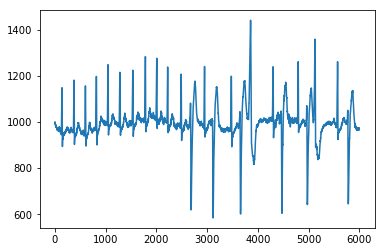

In [52]:
data = np.loadtxt("datos/200.txt")
ecg = np.loadtxt("datos/200.txt", usecols=(1))
plt.plot(ecg)
plt.show()

Este ECG es de un individuo que presenta arritmias ventriculares. Los primeros 11 latidos son normales, pero en la segunda mitad del registro se vuelven anormales.

Por default jupyter embebe la gráfica en el notebook como una imagen estática. Podemos también graficar en **modo interactivo**, ejecutando primero el siguiente comando:

In [57]:
# Si esto falla, probar: %matplotlib tk
%matplotlib inline

Ahora vuelve a intentar graficar:

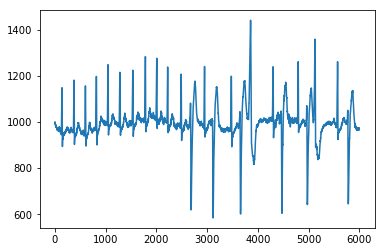

In [58]:
plt.clf()
plt.plot(ecg)
plt.show()

La gráfica aparecerá en una ventana externa. El modo interactivo permite ajustar la vista, hacer zoom, ajustar los márgenes y salvar la gráfica a disco.

**plt.clf()** ("clear figure") pone la figura actual en blanco y **plt.show()** muestra la figura.

Si le damos solamente los datos a plt.plot(), como hicimos, los valores del eje x serán simplemente números secuenciales. El arreglo de datos originales que cargamos contiene el tiempo (en unidades del aparato) en la columna 0. Con esto podemos especificar los valores del eje x:

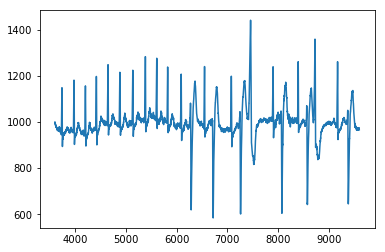

In [59]:
time = data[:,0]
plt.clf()
plt.plot(time, ecg)
plt.show()

Según la documentación de esta base de datos, los datos fueron capturados a 360 Hz. Podemos entonces convertir los valores del eje x a tiempo físico:

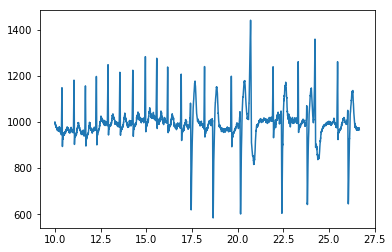

In [60]:
time = data[:,0] / 360
plt.clf()
plt.plot(time, ecg)
plt.show()

Similarmente, según la documentación los valores de voltaje están en unidades tales que 2048 = 10 mV, así que podemos poner las unidades reales en el eje y también:

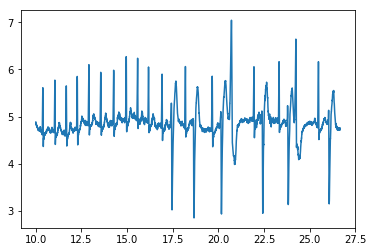

In [61]:
ecg = data[:,1] / 2048 * 10
plt.clf()
plt.plot(time, ecg)
plt.show()

Agregar etiquetas a los ejes y título a la gráfica se hace con las funciones **plt.xlabel()**, **plt.ylabel()** y **plt.title()**, y podemos agregar una retícula con **plt.grid()**:

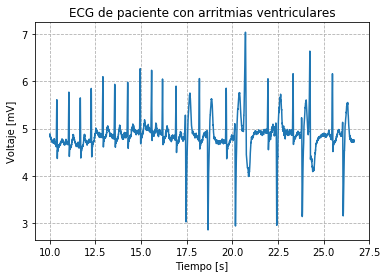

In [64]:
plt.clf()
plt.plot(time, ecg)
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.title("ECG de paciente con arritmias ventriculares")
plt.grid(ls="--")
plt.show()

Podemos cambiar el color y estilo de la línea de la gráfica usando las opciones **color** y **linestyle** (abreviada como **ls**) de pyplot, y agregar un marcador para los datos con **marker**:

In [73]:
%matplotlib
plt.clf()
plt.plot(time, ecg, ls="--", marker=".", color="r", alpha=0.5)
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.title("ECG de paciente con arritmias ventriculares")
plt.grid(ls=":")
plt.show()

Using matplotlib backend: TkAgg


Para más detalles sobre las opciones reconocidas, consultar la documentación:

Marcadores: https://matplotlib.org/api/markers_api.html

Líneas: https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/line_styles_reference.html

Colores: https://matplotlib.org/users/colors.html

Estas tres opciones también se pueden especificar de forma compacta justo después de los datos:

In [79]:
plt.clf()
plt.figure()
# Aquí, "r" quiere decir rojo, "." usar puntos como
# marcadores de datos y "-" línea continua.
plt.plot(time, ecg, "ro")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.title("ECG de paciente con arritmias ventriculares")
plt.grid(ls=":")
plt.show()

Para especificar los límites de los ejes usamos **plt.xlim()** y **plt.ylim()**. Aquí un "zoom" a un latido normal:

In [91]:
plt.clf()
plt.plot(time, ecg, "b.-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.title("ECG - latido normal")
plt.grid(ls=":")
plt.xlim(11.95, 12.7)
plt.ylim(4.3, 6.0)
plt.xticks([12.27], ["Pico R"])
plt.show()

... y aquí uno de un latido anormal en el que ocurrió una contracción ventricular prematura:

In [93]:
plt.clf()
plt.semilogy(time, ecg, "r.-")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [mV]")
plt.title("ECG - arritmia ventricular")
plt.grid(ls=":")
plt.xlim(18.3, 19.4)
plt.ylim(2.7, 5.8)

#plt.gca().xaxis.set_xticklabels([1]

plt.show()

Esto es lo más básico de matplotlib y suficiente para trabajar. Pero cabe mencionar que es una librería muy poderosa con muchísimas opciones de configuración. Pueden verse algunos ejemplos aquí: https://matplotlib.org/gallery.html

## 5. Ejercicio: ciclo circadiano

Hagamos ahora un ejercicio para poner a prueba lo anterior.

El archivo **datos/circadian.txt** contiene datos de (1) **actigrafía** (movimientos por minuto), (2) **temperatura corporal interna**, (3) **temperatura superficial de la piel** y (4) **ritmo cardiaco** registrados continuamente durante una semana completa. Carga primero los datos a un arreglo con el nombre que quieras:

In [96]:
# Carga los datos usando np.loadtxt()
### TU CÓDIGO AQUÍ
data = np.loadtxt("datos/circadian.txt")
print(data)
print(data.shape)

[[ 1267.7         36.695       32.          49.666667]
 [    7.61        36.695       31.688       49.      ]
 [  648.426667    36.695       31.25        48.      ]
 ..., 
 [ 1025.34        36.945       32.25        55.333333]
 [ 3368.77        36.945       32.312       54.      ]
 [ 2910.91        36.945       32.812       53.666667]]
(3360, 4)


La primera columna (índice 0) contiene la serie de tiempo de actigrafía, la segunda (índice 1) la de temperatura corporal, la tercera (índice 2) la de temperatura externa y la cuarta (índice 3) el ritmo cardiaco. Extrae las series en variables separadas.

In [99]:
# Extrae las series de tiempo individuales usando [:,x]
### TU CÓDIGO AQUÍ
actigrafia = data[:, 0]
coretemp = data[:, 1]
skintemp = data[:, 2]
heartrate = data[:, 3]
print(actigrafia)

[ 1267.7          7.61       648.426667 ...,  1025.34      3368.77      2910.91    ]


Este archivo de datos no incluye el tiempo, pero se nos dice que los puntos de datos están separados por 3 minutos. Generemos una serie con el tiempo.

La función **np.arange(N)** construye el arreglo de valores [0,1,2,...,N-1]. En este caso, queremos que N sea igual a la longitud de los registros, la cual puede obtenerse con la función **len()**. Genera un arreglo que contenga los tiempos para cada valor de las series:

In [103]:
# Primero obtén y la longitud de cualquiera de las series usando len()
### TU CÓDIGO AQUÍ
N = len(actigrafia)
print(N)

# Ahora genera los valores [0,1,2,...,N-1] usando np.arange(num_valores)
### TU CÓDIGO AQUÍ
time = np.arange(N)
print(time)

# Finalmente, escala los valores sencuenciales multiplicándolos por 3 / 60 para que queden en horas
### TU CÓDIGO AQUÍ
time = time * 3 / 60
print(time)

3360
[   0    1    2 ..., 3357 3358 3359]
[  0.00000000e+00   5.00000000e-02   1.00000000e-01 ...,   1.67850000e+02
   1.67900000e+02   1.67950000e+02]


Ahora grafica las series. Intenta simplemente usando plt.plot() múltiples veces. No te preocupes por etiquetas.

In [104]:
plt.clf()
### TU CÓDIGO AQUÍ
plt.plot(time, actigrafia)
plt.plot(time, coretemp)
plt.plot(time, skintemp)
plt.plot(time, heartrate)

plt.show()

Notarás que las serie de temperatura y la de ritmo cardiaco apenas se ven, pues sus valores son mucho más pequeños que los de actigrafía. Una solución es graficar cada serie en un **subplot** independiente.

Antes de cada plt.plot(), agrega **plot.subplot(4,1,i)**, donde i vale 1 para el primer plot, 2 para el segundo, etc.. La función plt.subplot(n,m,i) crea un arreglo de subplots de n filas y m columnas, y se posiciona en el i-ésimo subplot (contando de izquierda a derecha y de arriba a abajo).

In [123]:
%matplotlib 
plt.figure(figsize=(5,5))

plt.clf()
### TU CÓDIGO AQUÍ
plt.subplot(4, 1, 1)
plt.plot(time, actigrafia, "orange")
plt.xticks([])
plt.ylabel("Actigrafía [movs/min]", fontsize=12, color="orange")

plt.subplot(4, 1, 2)
plt.plot(time, coretemp, "r")
plt.xticks([])

plt.subplot(4, 1, 3)
plt.plot(time, skintemp, "b")
plt.xticks([])

plt.subplot(4, 1, 4)
plt.plot(time, heartrate, "k")

plt.subplots_adjust(hspace=0, top=.93, left=0.16)
plt.xlabel("Tiempo [horas]")

plt.savefig("ejemplo.eps")
#plt.show()

En estas cuatro series de tiempo se puede ver claramente el ciclo circadiano del individuo, de aproximadamente 24 horas de duración. La actividad física durante el día está muy correlacionada con el ritmo cardiaco, con la temperatura corporal siguiendo un poco más lentamente a estas dos variables. En cambio, la temperatura de la piel parece ser más alta durante las noches. Más adelante estudiaremos estas correlaciones.

## 6. Análisis en el dominio del tiempo

Se puede extraer mucha información cuantitativa y cualitativa analizando las series de tiempo directamente, lo que denominamos análisis *en el dominio del tiempo* (a diferencia del análisis en el dominio de la frecuencia).

Para mostrar esto via ejemplos, analizaremos datos de intervalos RR cardiacos de Physionet.

Los archivos "datos/On.txt" y "datos/Yn.txt", donde n es un número entre 1 y 5, contienen los registros de diez individuos de la base de datos de Fantasia (https://physionet.org/physiobank/database/fantasia/subset/). Cada archivo contiene una sola columna de intervalos RR sucesivos, en segundos, con una duración total de aproximadamente dos horas. Los archivos "O" son de adultos mayores mientras que los "Y" de adultos jóvenes.

Antes que nada, grafiquemos los datos. Como tenemos 10 series podemos escribir un bucle *for* para leerlas y graficarlas todos.

In [ ]:
# Fijamos el tamaño de la figura y la ponemos en blanco
plt.figure(num=1, figsize=(18,8))
plt.clf()

# Ponemos los mismos límites al eje y para facilitar la comparación visual
ymin = 0.6
ymax = 1.7

# Guardaremos las series leídas en dos listas de Python
jovenes = []
mayores = []

# Individuos jóvenes en la fila superior
# Como np.range, la función nativa de Python range(a,b) crea enteros secuenciales entre a y b-1
color = "green"
for i in range(1,5+1):

    fname = "datos/Y%i.txt" % (i)   
    data = np.loadtxt(fname)
    jovenes.append(data)
    
    plt.subplot(2,5,i)
    plt.plot(data, color=color)
    
    plt.xticks([0,2000,4000,6000,8000])
    plt.xlim(0,len(data))
    plt.ylim(ymin,ymax)
    plt.title("Y%i.txt" % (i))

# Individuos mayores en la fila inferior
color = "brown"
for i in range(1,5+1):
    
    fname = "datos/O%i.txt" % (i)   
    data = np.loadtxt(fname)
    mayores.append(data)
    
    plt.subplot(2,5,5+i)
    plt.plot(data, color=color)
    
    plt.xticks([0,2000,4000,6000,8000])
    plt.xlim(0,len(data))
    plt.ylim(ymin,ymax)
    plt.title("O%i.txt" % (i))

# Esto ayuda a que las subfiguras queden mejor acomodadas
plt.tight_layout()

plt.show()

El objetivo usual cuando se estudian datos de intervalos RR es estudiar su *variabilidad*. De la gráfica es inmediatamente claro que las series de intervalos RR de los adultos mayores se ven menos variables, en promedio, que las de los adultos jóvenes.

## 7. Histogramas y momentos estadísticos

Un diagnóstico inicial que suele hacerse con cualquier colección de datos que varían en torno a una cantidad más o menos constante es calcular y graficar su **histograma**. El histograma nos da visualmente información sobre el promedio, la variabilidad, la simetría y la importancia de las colas de los datos.

Para hacerlo en matplotlib basta con usar **plt.hist()**:

In [ ]:
plt.figure(num=1, figsize=(16,7))
plt.clf()

xmin = 0.6
xmax = 1.7

# Adultos jovenes
color = "green"
for i in range(1,5+1):

    plt.subplot(2,5,i)
    
    # Nótese que usamos [i-1] en los índices, pues los índices empiezan en cero en Python
    plt.hist(jovenes[i-1], bins=15, color=color)
    
    plt.title("Y%i.txt" % (i))
    plt.xlim(xmin, xmax)

# Adultos mayores
color = "brown"
for i in range(1,5+1):

    plt.subplot(2,5,i+5)

    plt.hist(mayores[i-1], bins=15, color=color)

    plt.title("O%i.txt" % (i))    
    plt.xlim(xmin, xmax)
    
plt.tight_layout()
plt.show()

Se ve claramente que las distribuciones de intervalos de los adultos mayores son en promedio más estrechas que las de los jóvenes.

Para cuantificar las diferencias en las distribuciones de valores se suelen calcular los cuatro primeros **momentos estadísticos**. Si $x_i$ representa los $N$ valores de la serie:

* **Media** ($\mu$): el "promedio" de los valores: $$ \mu \equiv \frac{1}{N} \sum_{i=1}^N x_i$$

* **Desviación estándar** ($\sigma$): la "anchura" de la variabilidad alrededor del promedio
$$\sigma \equiv \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2}$$
Entre mayor el valor, más grande la variabilidad. A veces se usa también la varianza, $var \equiv \sigma^2$.

* **Sesgo** ($sk$): la "simetría" de las desviaciones alrededor del promedio.
$$sk \equiv \frac{1}{(N-1)\sigma^3} \sum_{i=1}^N (x_i - \mu)^3$$
Si $sk < 0$, la distribución tiene una cola más larga hacia la izquierda, mientras que si $sk > 0$ la cola derecha es más larga; si $sk \approx 0$, la distribución es simétrica. Una distribución gaussiana tiene $sk = 0$.

* **Kurtosis** ($\kappa$): mide la importancia de las colas de la distribución, i.e. la frecuencia de *outliers* (valores que se alejan considerablemente del promedio); a veces se le denomina lo "picudo" de la distribución.
$$\kappa \equiv \frac{1}{(N-1)\sigma^4} \sum_{i=1}^N (x_i - \mu)^4 - 3$$
Si $\kappa > 0$ decimos que la distribución es *leptocúrtica* y suele verse "delgada" y "picuda" cerca de la media y con colas pesadas. Si $\kappa < 0$ decimos que la distribución es *platicúrtica* y suele verse "gorda" y "plano" cerca de la media y con colas poco pesadas.
Una distribución gaussiana tiene $\kappa = 0$. (Nota: a veces la kurtosis se define sin el 3 restado al final.)

Aunque son sencillos de calcular, numpy y scipy incluyen funciones para hacerlo por nosotros. La media y la desviación estándar son nativas de numpy (**np.mean()** y **np.std()**), y el sesgo y la kurtosis se encuentran en scipy.stats (**scipy.stats.skew** y **scipy.stats.kurtosis**).

Si calculamos los cuatro momentos para una de las series de adultos jóvenes obtenemos lo siguiente:

In [ ]:
intervalos = jovenes[0]

media = np.mean(intervalos)
desv = np.std(intervalos)
sesgo = scipy.stats.skew(intervalos)
kurt = scipy.stats.kurtosis(intervalos)

print("media =", media)
print("desv =", desv)
print("sesgo =", sesgo)
print("kurt =", kurt)

Vemos que el intervalo promedio es de 830 milisegundos, con una variabilidad típica de 93 ms, que hay un ligero sesgo (0.88) a la derecha y que la distribución es más "picuda" y con colas más gordas que una Gaussiana (i.e. leptokúrtica).

Veamos ahora cómo estos parámetros muestran las diferencias naturales en el ritmo cardiaco entre adultos jóvenes y adultos mayores.

Calculemos los cuatro parámetros para los 10 individuos.

In [ ]:
# Adultos jóvenes
medias_jovenes = []
desvs_jovenes = []
sesgos_jovenes = []
kurts_jovenes = []
for i in range(5):
    medias_jovenes.append(np.mean(jovenes[i]))
    desvs_jovenes.append(np.std(jovenes[i]))
    sesgos_jovenes.append(scipy.stats.skew(jovenes[i]))
    kurts_jovenes.append(scipy.stats.kurtosis(jovenes[i]))
    
# Adultos mayores
medias_mayores = []
desvs_mayores = []
sesgos_mayores = []
kurts_mayores = []
for i in range(5):
    medias_mayores.append(np.mean(mayores[i]))
    desvs_mayores.append(np.std(mayores[i]))
    sesgos_mayores.append(scipy.stats.skew(mayores[i]))
    kurts_mayores.append(scipy.stats.kurtosis(mayores[i]))    

Una forma de comparar visualmente estos resultados es mediante un *box and whisker plot* (o *box plot*), el cual representa gráficamente la estadística básica de conjuntos de números. En este caso, haremos un box plot de cada momento para los dos grupos, usando **plt.boxplot**().

In [ ]:
plt.figure(num=1, figsize=(8,8))
plt.clf()

plt.subplot(2,2,1)
plt.boxplot([medias_jovenes, medias_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("Media")

plt.subplot(2,2,2)
plt.boxplot([desvs_jovenes, desvs_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("Desviación estándar")

plt.subplot(2,2,3)
plt.boxplot([sesgos_jovenes, sesgos_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("Sesgo")

plt.subplot(2,2,4)
plt.boxplot([kurts_jovenes, kurts_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("Kurtosis")

plt.show()

Aunque son pocos datos y hay poco poder estadístico, este análisis sugiere que:
* El intervalo RR promedio de los adultos mayores es un poco más grande, y hay menos variabilidad entre individuos que en los jóvenes
* La variabilidad del intervalo RR de los adultos mayores (medida con la desviación estándar) es *bastante* más pequeña que la de los adultos jóvenes
* Los adultos mayores tienen sesgos y kurtosis más cercanos a los de una distribución Gaussiana

Estas diferencias en los momentos estadísticos también caracterizan cambios como la aparición de enfermdades; por ejemplo en la diabetes (River et al. 2016)

Otros dos indicadores de variabilidad cardiaca que suelen usarse son **pNN50**, el porcentaje de intervalos RR adyacentes con una diferencia mayor a 50 ms, **RMSSD** la raíz cuadrática media de las diferencias entre intervalos adyacentes, y la razón **SDNN/RMSSD**, donde SDNN es la desviación estándar (ver e.g. Antônio et al., J. of Cardiovascular Disease, Vol. 2, No. 3, 2014).

A continuación los calculamos también y los mostramos como box plots:

In [ ]:
def pNN50(datos):
    return sum(np.diff(datos) > 0.050) / len(datos-1)

def RMSSD(datos):
    N = len(datos)
    return np.sqrt(1/(N-2)*sum(np.diff(datos)**2))

# Adultos jóvenes
pNN50_jovenes = []
RMSSD_jovenes = []
SDNN_RMSSD_jovenes = []
for i in range(5):
    pNN50_jovenes.append(pNN50(jovenes[i]))
    RMSSD_jovenes.append(RMSSD(jovenes[i]))
    SDNN_RMSSD_jovenes.append(desvs_jovenes[i]/RMSSD_jovenes[i])
    
# Adultos mayores
pNN50_mayores = []
RMSSD_mayores = []
SDNN_RMSSD_mayores = []
for i in range(5):
    pNN50_mayores.append(pNN50(mayores[i]))
    RMSSD_mayores.append(RMSSD(mayores[i]))
    SDNN_RMSSD_mayores.append(desvs_mayores[i]/RMSSD_mayores[i])

plt.figure(num=1, figsize=(12,4))
plt.clf()

plt.subplot(1,3,1)
plt.boxplot([pNN50_jovenes, pNN50_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("pNN50")

plt.subplot(1,3,2)
plt.boxplot([RMSSD_jovenes, RMSSD_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("RMSSD")

plt.subplot(1,3,3)
plt.boxplot([SDNN_RMSSD_jovenes, SDNN_RMSSD_mayores], labels=["Jóvenes", "Mayores"], whis="range")
plt.title("SDNN/RMSSD")

plt.show()

Vemos, de nuevo, que estos indicadores estadísticos muestran claras diferencias en la variabilidad del ritmo cardiaco entre jóvenes y mayores.

## 8. Ajuste de curvas

Antes de continuar, una herramienta útil en general es ajustar curvas a una serie de datos. Numpy/scipy cuentan con varias herramientas para hacer esto.

Comencemos con la **regresión lineal**. La función **scipy.stats.linregress()** recibe un conjunto de datos (valores de x y de y) y devuelve los parámetros de la recta de mejor ajuste bajo mínimos cuadrados.

Como ejemplo, primero creemos un conjunto de datos compuesto de una señal oscilatoria (un coseno de periodo 2) + una tendencia lineal (con pendiente 2) + ruido Gaussiano (de amplitud 1).

In [ ]:
N = 1000
# np.linspace(a,b,N) crea N valores igualmente espaciados entre a y b
xs = np.linspace(0, 10, N)
# np.random.normal(size=n) genera N números aleatorios gaussianos normales
ys = np.cos(2*np.pi*xs/2) + (2*xs) + np.random.normal(size=N)

plt.figure(num=1)
plt.clf()
plt.plot(xs, ys, "b-")
plt.show()

Calculamos ahora la regresión lineal. scipy.stats.linregress() devuelve la pendiente y ordenada al origen de la recta, así como varios indicadores estadísticos sobre la calidad del ajuste.

In [ ]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(xs,ys)
print("slope =", slope)
print("intercept =", intercept)
print("rvalue =", rvalue)
print("pvalue =", pvalue)
print("stderr =", stderr)

Podemos agregar la recta de mejor ajuste a la gráfica:

In [ ]:
plt.figure(num=1)
plt.clf()
plt.plot(xs, ys, "b-")
plt.plot(xs, intercept + slope*xs, "r", lw=3)
plt.show()

Si los datos tienen una tendencia un poco más complicada, podemos usar **np.polyfit()** para hacer ajustes polinomiales de grado arbitrario via mínimos cuadrados.

En ese otro ejemplo tenemos la misma señal oscilatoria montada ahora sobre una tendencia cuadrática.

In [ ]:
N = 1000
xs = np.linspace(0, 10, N)
ys = np.cos(2*np.pi*xs/2) + (0.2*xs**2) + np.random.normal(size=N)

plt.figure(num=1)
plt.clf()
plt.plot(xs, ys, "b-")
plt.show()

Hacemos el ajuste con un polinomio de grado 2:

In [ ]:
params = np.polyfit(xs, ys, 2)
print("params =", params)

Los parámetros devueltos son los coeficientes del polinomio, en orden descendiente. Comprobamos que el ajuste es bueno agregándolo a la gráfica:

In [ ]:
plt.figure(num=1)
plt.clf()
plt.plot(xs, ys, "b-")
plt.plot(xs, params[0]*xs**2 + params[1]*xs + params[0], "r", lw=3)
plt.show()

Finalmente, para hacer ajustes más sofisticados y con modelos arbitrarios (no necesariamente polinomiales), está la poderosa función de ajuste no-lineal **scipy.optimize.curve_fit()**.

Un ejemplo claro es ajustar una Gaussiana a un conjunto de datos. Acá tenemos el histograma de uno de los individuos de la base de datos de Fantasia.

In [ ]:
plt.figure(num=1, figsize=(5,5))
plt.clf()
datos = np.loadtxt("datos/O3.txt")
conteos, bins, patches = plt.hist(datos, bins=30)
plt.show()

Para hacer un ajuste con curve.fit(), es necesario primero crear un modelo. Éste debe ser una función de Python que toma la variable independiente como primer argumento, y luego un número arbitrario de parámetros que definen el modelo: f(x, a, b, c, ...).

En este caso, queremos una Gaussiana así que tenemos 3 parámetros: la media, la desviación estándar, y un parámetro de escala.

In [ ]:
from numpy import sqrt, pi, exp
def modelo(x, mu, sigma, A):
    return A/(sigma*sqrt(2*pi)) * exp( -(x-mu)**2/2 / sqrt(2*pi*sigma**2) )

Ahora sí hacemos el ajuste:

In [ ]:
# Eliminamos el último valor de bins
xs = bins[:-1]
# Los conteos del histograma son los valores de y
ys = conteos[:]
popt, pcov = scipy.optimize.curve_fit(modelo, xs, ys)
print(popt)

El arreglo devuelto *popt* contiene los parámetros óptimos del modelo encontrados. En nuestro caso, corresponden a mu, sigma y A. Podemos ahora graficar la Gaussiana de mejor ajuste:

In [ ]:
plt.figure(num=1, figsize=(5,5))
plt.clf()
datos = np.loadtxt("datos/O3.txt")
conteos, bins, patches = plt.hist(datos, bins=30)
# Simplemente evaluamos el modleo usando los parámetros determinados por curve_fit()
plt.plot(xs, modelo(xs, popt[0], popt[1], popt[2]), "r", lw=3)
plt.show()

## 9. Técnicas no-lineales: Poincaré plot

Antes de finalizar el análisis en el dominio del tiempo veremos otra herramienta bastante usada en el análisis de series de tiempo fisiológicas: los llamados **"Poincaré plots"** (o a veces "recurrence plots").

Estos diagramas despliegan gráficamente información que nos permite ver la dinámica (distinguir entre aleatoriedad, regularidad y caos) y el tipo de correlaciones existentes en la serie de tiempo.

Son sencillos de calcular: en el eje x ponemos los valores de la serie de tiempo, $x_i$, mientras que en el eje y ponemos los valores de la serie de tiempo desplazados en 1, $x_{i+1}$.

Probemos de nuevo con datos de Fantasia:

In [ ]:
plt.figure(num=1, figsize=(6,6))
plt.clf()

datos = jovenes[1]

# Poincaré plot
# datos[:-1] extrae todos los datos excepto el último
# datos[1:] extrae todos los datos excepto el primero
plt.plot(datos[:-1], datos[1:], "o", alpha=0.5)

# Línea de identidad, x(i) = x(i+1)
xmin, xmax = plt.gca().get_xlim()
ymin, ymax = plt.gca().get_ylim()
plt.plot([xmin,xmax], [ymin,ymax], "r--")
plt.show()

En un Poincaré plot, entre más simétrica la "nube" de valores, menos correlaciones existen en la dinámica de la serie, y las periodicidades aparecen como bandas a 45° fuera de la diagonal.

Los indicadores principales cuantitativos estudiados a partir del Poincaré plot son **SD1** y **SD2**.

* **SD1** describe la variabilidad de **corto alcance** presente en los datos, y se obtiene de calcular las desviaciones de los datos perpendicular la línea de identidad:
$$ SD_1 = \frac{\sqrt{2}}{2} SD(x_i - x_{i+1}) $$

* **SD2** describe la variabilidad de **largo alcance** presente en los datos, y se obtiene de calcular las desviaciones de los datos sobre la línea de identidad:
$$ SD_2 = \sqrt{ 2 (SD(x_i))^2 - \frac{1}{2} (SD(x_i - x_{i+1}))^2} $$

donde $SD$ representa la desviación estándar de la cantidad indicada (Goliński 2013).

En el Poincaré plot, los indicadores SD1 y SD2 son los semiejes de una elipse cuyo eje mayor está alineado con la línea de identidad a 45° y cuyo centro es el centroide delos datos.

A continuación los calculamos y los agregamos a la gráfica.

In [ ]:
plt.figure(num=1, figsize=(6,6))
plt.clf()
datos = jovenes[1]
plt.plot(datos[:-1], datos[1:], "o", alpha=0.5)
xmin, xmax = plt.gca().get_xlim()
ymin, ymax = plt.gca().get_ylim()
plt.plot([xmin,xmax], [ymin,ymax], "r--")
plt.show()

# Desviación estándar de los datos (sin el último valor)
SDN = np.std(datos[:-1])
# Desviación estándar de las diferencias sucesivas
SDSD = np.std(datos[:-1] - datos[1:])

SD1 = np.sqrt(2)/2 * SDSD
SD2 = np.sqrt( 2*SDN**2 - 0.5*SDSD**2 )

print("SD1 =", SD1)
print("SD2 =", SD2)

# Centroide de los datos en el diagrama
xc = np.mean(datos[:-1])
yc = np.mean(datos[1:])

# Ahora los graficamos como una elipse
from matplotlib.patches import Ellipse
ax = plt.gca()    # Obtiene los ejes de la gráfica
ax.set_aspect("equal")    # Pone el aspect ratio de los ejes igual
elipse = Ellipse(xy=(xc,yc), width=2*SD2, height=2*SD1, angle=45, fc="none", ec="r", lw=2, zorder=2)
ax.add_artist(elipse)

# Y marcamos SD1 y SD2 con segmentos
plt.plot([xc,xc-SD1/np.sqrt(2)], [yc,yc+SD1/np.sqrt(2)], "k")
plt.plot([xc,xc+SD2/np.sqrt(2)], [yc,yc+SD2/np.sqrt(2)], "b")
plt.text(xc-SD1/np.sqrt(2), yc+SD1/np.sqrt(2), "SD1", color="k", ha="center")
plt.text(xc+SD2/np.sqrt(2), yc+SD2/np.sqrt(2), "SD2", color="b", ha="center")
plt.show()

Se ha encontrado que la razón **SD1/SD2** es un indicador de la aleatoriedad en la variabilidad y que refleja el balance simpatovagal (Hsu et al. 2012), y que su valor es estadísticamente distinto bajo enfermedades incluyendo la diabetes (Kitlas et al. 2004), falla renal crónica (Lerma et al. 2003) y enfermedad arterial coronaria (Hoshi 2013).

## 10. Correlación entre series de tiempo

Otro concepto muy importante en análisis de series de tiempo es la **correlación**, también llamada *covarianza*, entre dos (o más) series de tiempo simultáneas.

La correlación entre dos series de tiempo describe la medida en que las dos series cambian juntas. Si cuando una serie aumenta la otra también, decimos que tienen correlación (positiva); si cuando una serie aumenta la otra disminuye, tienen correlación negativa. No hay correlación cuando lo que hace una serie no dice nada sobre lo que hace la otra.

La forma más conveniente de estudiar la correlación (lineal) entre series de tiempo es mediante el **coeficiente de correlación de Pearson**, $r$. Dadas dos series de tiempo, $r$ está siempre en el rango $-1 \leq r \leq 1$, e indica el grado (y signo) de la correlación entre ellas, con +1 siendo máxima correlación, -1 máxima *anti*correlación, y 0 ninguna correlación.

En numpy podemos calcular el coeficiente de correlación de Pearson usando **np.corrcoef()**. Hagamos esto con las series de ritmo circadiano que vimos al principio, pues son registros simultáneos.

In [ ]:
# El archivo contiene 4 columnas de datos:
# actigrafía, temperatura corporal, temperatura
# externa y ritmo cardiaco
datos = np.loadtxt("datos/circadian.txt")
actigrafia = datos[:,0]
coretemp = datos[:,1]
exttemp = datos[:,2]
heartrate = datos[:,3]
tiempo = np.arange(len(actigrafia))* 3 / 60

Calculemos el coeficiente de correlación entre la actigrafía y la temperatura corporal:

In [ ]:
# np.corrcoef devuelve una matriz simétrica de NxN, donde
# N es el número de series, y el elemento (i,j) es el coef
# de correlación entre la series y la series j
corrmatrix = np.corrcoef(actigrafia, coretemp)

# En este caso el elemento [0,1] (o [1,0]) es el coef. de
# correlación:
r = corrmatrix[0,1]
print("r=", r)

El coeficiente indica que hay un cierto grado de correlación (positiva) entre las dos: cuando la actividad aumenta, la temperatura corporal sube; cuando la actividad disminuye, la temperatura baja.

También se puede usar **scipy.stats.pearsonr**, que funciona para dos variables y además de devolver $r$ devuelve el p-value una prueba de hipótesis con la hipótesis nula de que las variables no tienen correlación:

In [ ]:
r, pvalue = scipy.stats.pearsonr(actigrafia, coretemp)
print("r =", r)
print("pvalue =", pvalue)

El p-value confirma que es virtualmente imposible que este valor de $r$ sea accidental.

Finalmente, una ventaja de np.corrcoef() es que se le puede también dar una matriz de valores, en la que cada fila representa una serie de tiempo simultánea, y nos calculará los coeficientes de correlación para todas las parejas de variables.

La matriz datos cargada directamente del archivo contiene las series como columnas, así que basta con transponerla usando **.T**:

In [ ]:
corrmatrix = np.corrcoef(datos.T)
print(corrmatrix)

El elemento (i,j) de esta matriz es el coeficiente de correlación entre la variable y la variable j. Podemos mostrarlos ver estas correlaciones visualmente graficando la matriz con **plt.imshow()**:

In [ ]:
# Truco para pintar la diagonal en gris
corrmatrix_diag = np.fill_diagonal(corrmatrix, np.nan)
cmap = plt.cm.coolwarm
cmap.set_bad((0.4, 0.4, 0.4))

plt.figure(num=1)
plt.clf()
plt.imshow(corrmatrix, cmap=cmap, vmin=-1, vmax=1)
plt.title("Coeficientes de correlación de Pearson", y=1.08)

# Etiquetas
ticks = [0, 1, 2, 3]
ticklabels = ["Actigrafía", "T corporal", "T piel", "Ritmo Card."] 
plt.xticks(ticks, ticklabels)
plt.yticks(ticks, ticklabels)
plt.gca().xaxis.tick_top()

# Barra de color
plt.colorbar()

plt.show()

## 11. Análisis en el dominio de la frecuencia: la transformada de Fourier y el PSD

El análisis en el dominio de la frecuencia, también conocido como *análisis espectral*, estudia el contenido de frecuencia de los datos, es decir, estudia la importancia relativa de la variabilidad de la señal a diferentes escalas de tiempo. Esto se hace aplicando primero la transformación de Fourier a los datos, pasando la serie del espacio del tiempo al espacio de la frecuencia.

La herramienta principal es el **PSD** (o Power Spectral Density), también conocido como *espectro de potencia* (o *power spectrum*). Se define como:

$$ PSD \equiv \left| \mathscr{F}(x(t)) \right|^2 $$

donde $\mathscr{F}(x(t))$ es la *transformada de Fourier* de la serie de tiempo $x(t)$:

$$ \mathscr{F}(x(t)) \equiv \hat{x}(f) \equiv \int_{-\infty}^{\infty} x(t) e^{-2\pi i f t} dt$$

Del PSD se suelen extraer y comparar las áreas bajo la curva principalmente en dos bandas de frecuencia con un significado fisiológico conocido:

* **LF** (low-frequency): banda $0.04 \leq f \leq 0.15$ Hz, es una medida de la actividad nerviosa simpática
* **HF** (high-frequency): banda $0.15 \leq f \leq 0.4$ Hz, es una medida de la actividad nerviosa parasimpática

La razón **LF/HF** se ha propuesto como un indicador del balance entre estas dos componentes del sistema nervioso, y se ha encontrado que sufre cambios importantes en la enfermedad, como diabetes (Kudat et al. 2006), enfermedades cardiovasculares (Reyes del Paso et al. 2013), epilepsia (Evrengüi et al. 2005), etc.

Un buen ejemplo introductorio para la lectura del PSD es estudiar una serie de tiempo con claras periodicidades.

Un experimento estándar en el estudio de la variabilidad cardiaca es el de *respiración rítmica*, en el que se pide al individuo respirar de forma rítmica a una frecuencia determinada (un ciclo de respiración cada 4 segundos o cada 10 segundos). Se ha encontrado que en condiciones de salud durante este prueba los intervalos RR se modulan a la frecuencia de la respiración, indicando la regulación correcta del sistema nervioso sobre al ritmo cardiaco.

Los archivos que empiezan con **"datos/RR\_resp_"** contienen series de tiempo de intervalos RR bajo tres situaciones: respiración normal ("datos/RR_resp_libre.txt"), respiración rítmica a 0.1 Hz ("datos/RR_resp_01Hz.txt") y respiración rítmica a 0.25 Hz ("datos/RR_resp_025Hz.txt").

Carguemos primero el archivo de respiración libre ("datos/RR_resp_libre.txt"), grafiquemos los datos y calculemos su PSD:

In [ ]:
datos = np.loadtxt("datos/RR_resp_libre.txt")

# Graficamos los datos
plt.figure(num=1, figsize=(14,6))
plt.clf()
plt.subplot(1,2,1)
plt.plot(datos)
plt.xlim(0, len(datos))
plt.xlabel("Número de intervalo")
plt.ylabel("Intervalo RR [s]")
plt.title("Intervalos RR (respiración libre)")

# La transformada de Fourier se obtiene con np.fft.rfft,
# y obtenemos su norma cuadrada para obtener el PSD
potencia = np.abs(np.fft.rfft(datos))**2

# Para obtener las frecuencias usamos np.fft.rfftfreq, a la que 
# debemos pasarle el número de datos y el intervalo temporal (en segundos)
# entre datos epara que la frecuencia esté en Hz (usamos aquí el RR promedio)
frecuencias = np.fft.rfftfreq(len(datos), d=np.mean(datos))

# Se suele quitar el primer punto (llamado término DC)
potencia = potencia[1:]
frecuencias = frecuencias[1:]

# Graficamos el PSD, con las frecuencias en el eje x y la potencia en el y
plt.subplot(1,2,2)
plt.plot(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración libre)")
plt.show()

Vemos que la mayor parte de la potencia se encuentra a bajas (y muy bajas) frecuencias.

(Nota: el PSD suele graficarse en escala log-log. Esto se puede hacer usando **plt.loglog()** en vez de plt.plot(); la sintaxis es la misma.)

Comparemos ahora con el de respiración rítmica a 0.1 Hz:

In [ ]:
datos = np.loadtxt("datos/RR_resp_01Hz.txt")

plt.figure(num=2, figsize=(14,6))
plt.clf()
plt.subplot(1,2,1)
plt.plot(datos)
plt.xlim(0, len(datos))
plt.xlabel("Número de intervalo")
plt.ylabel("Intervalo RR [s]")
plt.title("Intervalos RR (respiración rítmica a 0.1 Hz)")

potencia = np.abs(np.fft.rfft(datos))**2
frecuencias = np.fft.rfftfreq(len(datos), d=np.mean(datos))
potencia = potencia[1:]
frecuencias = frecuencias[1:]

plt.subplot(1,2,2)
plt.plot(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración rítmica a 0.1 Hz)")
plt.show()

Es inmediatamente obvio el pronuncidado pico a 0.1 Hz. Los picos en el PSD indican **periodicidades** de la serie de tiempo, y en este caso el PSD claramente captura la modulación a 0.1 Hz introducida por la respiración rítmica.

Ojo: también hay un pico más pequeño a 0.2 Hz. Aunque uno podría pensar que es una periodicidad a esa frecuencia en realidad muy probablemente es un *artefacto* de la transformada de Fourier. Con datos reales Fourier suele crear *armónicos* de las periodicidades, señales espurios en múltiplos enteros de la frecuencia real base. Cuidado con esto.

Y con el de respiración rítmica a 0.25 Hz:

In [ ]:
datos = np.loadtxt("datos/RR_resp_025Hz.txt")

plt.figure(num=3, figsize=(14,6))
plt.clf()
plt.subplot(1,2,1)
plt.plot(datos)
plt.xlim(0, len(datos))
plt.xlabel("Número de intervalo")
plt.ylabel("Intervalo RR [s]")
plt.title("Intervalos RR (respiración rítmica a 0.25 Hz)")

potencia = np.abs(np.fft.rfft(datos))**2
frecuencias = np.fft.rfftfreq(len(datos), d=np.mean(datos))
potencia = potencia[1:]
frecuencias = frecuencias[1:]

plt.subplot(1,2,2)
plt.plot(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración rítmica a 0.25 Hz)")
plt.show()

El PSD de nuevo muestra una fuerte periodicidad a la frecuencia de la respiración, 0.25 Hz.

Volvamos al espectro de respiración libre, y veamos las bandas LF y HF:

In [ ]:
datos = np.loadtxt("datos/RR_resp_libre.txt")
potencia = np.abs(np.fft.rfft(datos))**2
frecuencias = np.fft.rfftfreq(len(datos), d=np.mean(datos))
potencia = potencia[1:]
frecuencias = frecuencias[1:]

plt.clf()
plt.plot(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración libre)")
# La función plt.axvline() grafica una línea vertical en el valor dado
plt.axvline(0.04, ls=":")
plt.axvline(0.15, ls=":")
plt.axvline(0.40, ls=":")
plt.text(0.10, 12, "LF", ha="center")
plt.text(0.27, 12, "HF", ha="center")
plt.show()

Las bandas LF y HF están indicadas entre las líneas verticales punteadas.

Los valores cuantitativos de LF y HF se obtienen calculando el área bajo el PSD en cada región. Esto se hace mediante integración, aunque se puede aproximar simplemente haciendo la suma de los valores del PSD en cada banda y multiplicando por el intervalo de frecuencia entre valores:

In [ ]:
# Hacemos un loop sobre las frecuencias, y sumamos la potencia en las bandas correspondientes a LF y HF
LF = 0.0
HF = 0.0
for i in range(len(frecuencias)):
    frec = frecuencias[i]
    if frec >= 0.04 and frec <= 0.15:
        LF = LF + potencia[i]
    elif frec >= 0.15 and frec <= 0.4:
        HF = HF + potencia[i]
deltaf = frecuencias[1] - frecuencias[0]
LF = LF * deltaf
HF = HF * deltaf

print("LF =", LF)
print("HF =", HF)

plt.clf()
plt.plot(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración libre)")
plt.axvline(0.04, ls=":")
plt.axvline(0.15, ls=":")
plt.axvline(0.40, ls=":")
plt.text(0.095, 12, "LF = %.4f" % LF, ha="center")
plt.text(0.27, 12, "HF = %.4f" % HF, ha="center")
# ax.fill_between nos permite sombrear el área entre curvas
ax = plt.gca()
ymin, ymax = ax.get_ylim()
ax.fill_between(frecuencias, potencia, y2=ymin, where=np.logical_and(frecuencias >= 0.039, frecuencias <= 0.15), color="blue", alpha=0.5)
ax.fill_between(frecuencias, potencia, y2=ymin, where=np.logical_and(frecuencias >= 0.149, frecuencias <= 0.4), color="green", alpha=0.5)
plt.ylim(ymin, ymax)

plt.show()

La razón LF/HF se ha usado tradicionalmente como un indicador del balance simpatovagal, con valores cercanos a 1 representativos de la salud, aunque recientemente se ha puesto en duda esta interpretación (e.g. Billman 2013).

Además, se ha encontrado que este acoplamiento cardiorespiratorio se pierde (y tal pérdida es evidente en el PSD) con la diabetes (Rivera et al. 2016).

Otro aspecto importante del PSD es la aparación de **invarianza de escala** en la manera en que la potencia escala con la frecuencia; esto ocurre cuando $P \propto f^{-\beta}$. Si se grafica en escala log-log, el PSD muestra invarianza de escala cuando se ve (aproximadamente) como una recta.

El **exponente de escalamiento $\beta$** cuantifica la correlación en las fluctuaciones, con $\beta = 0$ indicando *ruido blanco* (aleatorio), $\beta = 2$ *ruido Browniano* (muy correlacionado) y $\beta \approx 1$, llamado *ruido 1/f* o *ruido rosa*, indicando un balance entre estos extremos, el cual se piensa es característico del balance dinámico óptimo en muchos sistemas biológicos (e.g. Musha 1981).

Grafiquemos el espectro de intervalos RR en respiración libre en log-log:

In [ ]:
plt.clf()
# Usamos plt.loglog() en lugar de plt.plot
plt.loglog(frecuencias, potencia)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [s^2/Hz]")
plt.title("PSD de intervalos RR (respiración libre)")
plt.show()

Se ve que hay aproximadamente una línea recta.

Para obtener el exponente $\beta$ debemos ajustar una ley de potencia al PSD, es decir, encontrar $P_0$ y $\beta$ tales que $P = P_0 \times f^{-\beta}$. Si tomamos el logaritmo de esta ecuación, se tiene $\log(P) = \log(P_0) - \beta \cdot \log(f)$. Vemos que $-\beta$ es la pendiente de la recta en espacio log-log, y podemos entonces obtenerla directamente haciendo una regresión al logaritmo del PSD.

Usemos scipy.stats.linregress() para obtener la recta de mejor ajuste al espectro logarítmico, y así obtener $\beta$:

In [ ]:
logfreq = np.log(frecuencias)
logpot = np.log(potencia)
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(logfreq, logpot)
beta = -slope
P0 = np.exp(intercept)
print("pendiente =", slope)
print("beta =", beta)
print("P0 =", P0)

plt.clf()
plt.loglog(frecuencias, potencia)
plt.loglog(frecuencias, P0*frecuencias**(-beta), "r--")
plt.title("PSD de intervalos RR (respiración libre)")
plt.text(1e-2, 1e-2, "beta = %.3f" % beta, color="r")
plt.show()

Se ve que $\beta$ está cerca de 1, indicando cercanía a las condiciones normales en la salud.

## 12. Análisis tiempo-frecuencia: el espectrograma

La transformada de Fourier presupone que la serie de tiempo es *estacionaria*, es decir, que sus propiedades estadísticas y estructura de correlación no cambian en el tiempo.

Sin embargo, en muchos casos reales las series de tiempo no son estacionarias. Para tratar estos casos existen generalizaciones de la transformada de Fourier que permiten estudiar cómo cambia en el tiempo la composición espectral.

Una de estas técnicas es el **espectrograma**, el cual se obtiene del **short-time Fourier transform** (coloquialmente, *transformada de Fourier ventaneada*).

En términos simples, la idea es ir pasando una ventana temporal corta sobre la serie de tiempo para extraer segmentos cortos, aplicar la transformada de Fourier a cada segmento, y agregar los PSDs resultantes en un diagrama 2D, donde el eje x contiene ahora el tiempo, la frecuencia queda en el eje y, y el color indica la potencia:

<img src="imgs/STFT.png">

Conveniente scipy incluye una función para hacer este procedimiendo: **scipy.signal.spectrogram()**.

Hagamos un ejemplo con los datos de ciclo circadiano que vimos al principio, pues claramente la actividad física cambia en el tiempo entre la vigilia durante el día y el sueño durante la noche.

In [ ]:
import matplotlib.colors as colors
datos = np.loadtxt("datos/circadian.txt")
actigrafia = datos[:,0]
tiempo = np.arange(len(actigrafia)) * 3 / 60

plt.figure(num=1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(tiempo, actigrafia)
plt.xlim(0, 168)
plt.xticks([i*24 for i in range(8)])

# Calculamos el espectrograma
# Obtenemos el vector de frecuencias, el de tiempos y
# la matriz de potencias para cada pareja (tiempo, frecuencia)
# fs indica la frecuencia de sampleo (la escogemos en días)
f, t, Sxx = scipy.signal.spectrogram(actigrafia, fs=60/3, nperseg=64)

# Graficamos el espectrograma usando plt.pcolormesh()
plt.subplot(2,1,2)
plt.pcolormesh(t, f, Sxx, norm=colors.LogNorm(vmin=1e-1, vmax=1e6))
plt.xticks([i*24 for i in range(8)])
plt.xlabel("Tiempo [horas]")
plt.ylabel("Frecuencia [ciclos/hora]")

plt.show()

Se observan claramente los periodos de sueño, en los que la potencia (a todas las frecuencias) es muy baja.

## 13: Continuous Wavelet Transform

Otra opción popular para análisis tiempo-frecuencia es el **Continuous Wavelet Transform** (CWT), o *wavelets* coloquialmente.

La idea aquí es que tomamos una función oscilatoria simple y acotada en el tiempo, llamada la *wavelet madre*, y comparamos (convolucionamos) la señal con copias de la wavelet madre que han sido *escaladas* (estiradas o comprimidas) y *desplazadas en el tiempo*. Esto permite capturar oscilaciones a muchas frecuencias distintas, dadas por las escalas de las wavelet "hijas", y estudiar cómo evolucionan en el tiempo.

<img src="imgs/CWT.jpg">

El resultado del CTW puede depender sustancialmente de la elección de la wavelet madre, y hay muchas de dónde escoger:

<img src="imgs/wavelets.jpg">

La recomendación general es escoger una wavelet cuyas oscilaciones se asemejan a las presentes en la serie de tiempo a estudiar.

El resultado es un *escalograma*, similar al espectrograma en el sentido que tiene al tiempo en el eje horizontal, a la escala de oscilación (recíproco de la frecuencia) en el vertical y la potencia indicada con un mapa de color.

Podemos calcular un escalograma de una serie de tiempo usando **scipy.signal.cwt()**.

In [ ]:
datos = np.loadtxt("datos/circadian.txt")
actigrafia = datos[:,0]
tiempo = np.arange(len(actigrafia)) * 3 / 60

plt.figure(num=1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(tiempo, actigrafia)
plt.xlim(0, 168)
plt.xticks([i*24 for i in range(8)])

# Calculamos el escalograma
# Es necesario darle la señal, la wavelet madre a usar (aquí usamos
# una predefinida, la ricker wavelet), y un vector con las escalas.
# Obtenemos la matriz de potencia como función de tiempo y frecuencia.
escalas = np.linspace(1, 250, 100)
Sxx = scipy.signal.cwt(actigrafia, scipy.signal.ricker, escalas)

# Graficamos el escalograma usando plt.pcolormesh()
plt.subplot(2,1,2)
plt.pcolormesh(tiempo, escalas, Sxx)
plt.xticks([i*24 for i in range(8)])
plt.xlabel("Tiempo [horas]")
plt.ylabel("Escala")

plt.show()

De nuevo se pueden apreciar, aunque más claramente, la banda correspondiente al ciclo circadiano.